_Lambda School Data Science, Unit 2_
 
# Regression 2 Sprint Challenge: Predict drugstore sales 🏥

For your Sprint Challenge, you'll use real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

You are given three dataframes:

- `train`: historical sales data for 100 stores
- `test`: historical sales data for 100 different stores
- `store`: supplemental information about the stores


The train and test set do _not_ have different date ranges. But they _do_ have different store ids. Your task is _not_ to forecast future sales from past sales. **Your task is to predict sales at unknown stores, from sales at known stores.**

In [6]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

The dataframes have a variety of columns:

- **Store** - a unique Id for each store
- **DayOfWeek** - integer, 1-6
- **Date** - the date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target you are predicting)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

This Sprint Challenge has three parts. To demonstrate mastery on each part, do all the required instructions. To earn a score of "3" for the part, also do the stretch goals.

## 1. Wrangle relational data, Log-transform the target
- Merge the `store` dataframe with the `train` and `test` dataframes. 
- Arrange the X matrix and y vector for the train and test sets.
- Log-transform the target for the train and test set.
- Plot the target's distribution for the train set, before and after the transformation.

#### Stretch goals
- Engineer 3+ more features.

In [7]:
# Quick exploration of dataframes pt1

train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
31013,134,4,2014-07-24,4728,518,0,1
35446,496,1,2014-06-02,13209,1172,1,0
69329,301,5,2013-04-19,5350,640,0,0
1971,802,4,2015-07-09,5571,492,0,0
75190,1007,5,2013-02-08,7334,811,1,0


In [8]:
# Quick exploration of dataframes pt2

store.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
62,333,a,c,3720.0,2.0,2010.0,0,NaN,NaN,NaN
159,856,a,a,3020.0,2.0,2010.0,0,NaN,NaN,NaN
139,730,c,a,1190.0,9.0,2013.0,0,NaN,NaN,NaN
46,246,c,a,4660.0,4.0,2013.0,0,NaN,NaN,NaN
12,63,c,c,3700.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov"
84,464,c,a,520.0,3.0,2009.0,0,NaN,NaN,NaN
116,599,d,c,580.0,11.0,2014.0,0,NaN,NaN,NaN
34,197,c,a,4210.0,3.0,2015.0,0,NaN,NaN,NaN
85,468,c,c,5260.0,9.0,2012.0,0,NaN,NaN,NaN
125,647,a,c,7420.0,4.0,2013.0,0,NaN,NaN,NaN


In [9]:
# Any null values pt1?

train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
SchoolHoliday    0
dtype: int64

In [10]:
# Any null values pt2?

store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            1
CompetitionOpenSinceMonth     37
CompetitionOpenSinceYear      37
Promo2                         0
Promo2SinceWeek              164
Promo2SinceYear              164
PromoInterval                164
dtype: int64

In [11]:
# Merge data

train = train.merge(store, how='left')
test = test.merge(store, how='left')
print(train.shape,test.shape)

(78400, 16) (78400, 16)


In [12]:
# Arrange X matrix and y vector for train and test datasets

target = 'Sales'

X_train = train.drop(columns = target)
y_train = train[target]

X_test  = test.drop(columns = target)
y_test = test[target]

In [13]:
# Log transform target and test sets

import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

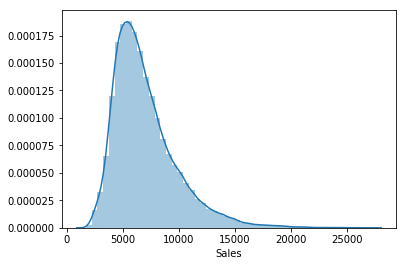

In [14]:
# Plot target distribution pt1

import seaborn as sns

sns.distplot(y_train);

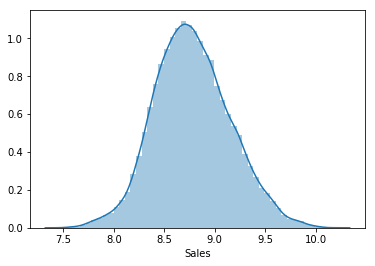

In [15]:
# Plot target distribution pt2

sns.distplot(y_train_log)

In [16]:
# Engineer some features for fun. These features ended up not getting used for the model.

def engineer_features(X):
    X = X.copy()
    
    X['Weekday'] = ((X['DayOfWeek'] == 1) | 
                    (X['DayOfWeek'] == 2) |
                    (X['DayOfWeek'] == 3) |
                    (X['DayOfWeek'] == 4) |
                    (X['DayOfWeek'] == 5) )
    
    X['Xmas_sale'] = X['PromoInterval'].fillna("None").str.contains("Dec")
        # Redundant, actually this overlaps with PromoInterval = Mar,Jun,Sept,Dec
        
    X['Competition_is_Close'] = X['CompetitionDistance'] < 1000

    return X

X_train_engineered = engineer_features(X_train)
X_test_engineered  = engineer_features(X_test)

X_train_engineered.sample(5)

,Store,DayOfWeek,Date,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekday,Xmas_sale,Competition_is_Close
41163,683,6,2014-03-22,568,0,0,a,a,2850.0,7.0,2014.0,0,NaN,NaN,NaN,False,False,False
4219,221,5,2015-06-12,536,0,0,d,c,13530.0,9.0,2013.0,0,NaN,NaN,NaN,True,False,False
43255,580,3,2014-02-26,1412,0,0,a,c,170.0,2.0,2009.0,0,NaN,NaN,NaN,True,False,True
71973,822,1,2013-03-18,528,1,0,a,c,410.0,11.0,2010.0,1,48.0,2010.0,"Mar,Jun,Sept,Dec",True,True,True
41142,472,6,2014-03-22,611,0,0,c,c,5030.0,8.0,2011.0,0,NaN,NaN,NaN,False,False,False


## 2. Fit and validate your model
- **Use Gradient Boosting** or any type of regression model.
- **Beat the baseline:** The estimated baseline Root Mean Squared Logarithmic Error is 0.90, if we guessed the mean sales for every prediction. Remember that RMSE with the log-transformed target is equivalent to RMSLE with the original target. Try to get your error below 0.20.
- **To validate your model, choose any one of these options:**
  - Split the train dataframe into train and validation sets. Put all dates for a given store into the same set. Use xgboost `early_stopping_rounds` with the validation set. 
  - Or, use scikit-learn `cross_val_score`. Put all dates for a given store into the same fold.
  - Or, use scikit-learn `RandomizedSearchCV` for hyperparameter optimization. Put all dates for a given store into the same fold.
- **Get the Validation Error** (multiple times if you try multiple iterations) **and Test Error** (one time, at the end).
  
#### Stretch goal
- Optimize 3+ hyperparameters by searching 10+ "candidates" (possible combinations of hyperparameters). 

In [17]:
# Split train dataframe into train and validation sets while
# putting stores in same set

import numpy as np
from sklearn.model_selection import train_test_split

trainval = train
trainval_store = trainval['Store'].unique()
train_store, val_store = train_test_split(trainval_store, random_state=42)
train = trainval[trainval.Store.isin(train_store)]
val = trainval[trainval.Store.isin(val_store)]


target = 'Sales'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns=target)

y_test = test[target]
y_val = val[target]
y_train = train[target]

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [18]:
# Decide features for model

features = ['Customers','Promo','DayOfWeek','StoreType']

X_train = X_train[features]
X_val   = X_val[features]
X_test  = X_test[features]

In [19]:
# Do ordinal encoding
import category_encoders as ce

encoder = ce.OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [20]:
# XGBoost to validation set

from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=2000, verbosity=0, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, 
          eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=50)

[0]	validation_0-rmse:7.47822	validation_1-rmse:7.39615
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:6.73096	validation_1-rmse:6.64893
[2]	validation_0-rmse:6.05845	validation_1-rmse:5.97671
[3]	validation_0-rmse:5.45322	validation_1-rmse:5.37243
[4]	validation_0-rmse:4.90856	validation_1-rmse:4.82757
[5]	validation_0-rmse:4.41839	validation_1-rmse:4.33831
[6]	validation_0-rmse:3.9773	validation_1-rmse:3.89689
[7]	validation_0-rmse:3.58037	validation_1-rmse:3.50083
[8]	validation_0-rmse:3.22319	validation_1-rmse:3.14429
[9]	validation_0-rmse:2.90182	validation_1-rmse:2.82373
[10]	validation_0-rmse:2.61265	validation_1-rmse:2.53499
[11]	validation_0-rmse:2.35249	validation_1-rmse:2.27549
[12]	validation_0-rmse:2.11846	validation_1-rmse:2.04233
[13]	validation_0-rmse:1.90794	validation_1-rmse:1.83251
[14]	validation_0-rmse:1.71858	validation_1-rmse:1.643

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=0)

In [21]:
# XGBoost to test set

eval_set = [(X_train_encoded, y_train_log), 
            (X_test_encoded, y_test_log)]


model = XGBRegressor(n_estimators=2000, verbosity=0, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, 
          eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=50)

[0]	validation_0-rmse:7.47822	validation_1-rmse:7.49287
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:6.73096	validation_1-rmse:6.74462
[2]	validation_0-rmse:6.05845	validation_1-rmse:6.07129
[3]	validation_0-rmse:5.45322	validation_1-rmse:5.46532
[4]	validation_0-rmse:4.90856	validation_1-rmse:4.91997
[5]	validation_0-rmse:4.41839	validation_1-rmse:4.42914
[6]	validation_0-rmse:3.9773	validation_1-rmse:3.98732
[7]	validation_0-rmse:3.58037	validation_1-rmse:3.58996
[8]	validation_0-rmse:3.22319	validation_1-rmse:3.23238
[9]	validation_0-rmse:2.90182	validation_1-rmse:2.91063
[10]	validation_0-rmse:2.61265	validation_1-rmse:2.62114
[11]	validation_0-rmse:2.35249	validation_1-rmse:2.36115
[12]	validation_0-rmse:2.11846	validation_1-rmse:2.12698
[13]	validation_0-rmse:1.90794	validation_1-rmse:1.91616
[14]	validation_0-rmse:1.71858	validation_1-rmse:1.726

[137]	validation_0-rmse:0.145121	validation_1-rmse:0.148411
[138]	validation_0-rmse:0.145116	validation_1-rmse:0.148419
[139]	validation_0-rmse:0.145108	validation_1-rmse:0.148401
[140]	validation_0-rmse:0.145104	validation_1-rmse:0.148403
[141]	validation_0-rmse:0.145095	validation_1-rmse:0.148418
Stopping. Best iteration:
[91]	validation_0-rmse:0.145597	validation_1-rmse:0.148307



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=0)

In [22]:
print('Validation Error:', np.expm1(0.147427))
print('Test Error:', np.expm1(0.148307))

Validation Error: 0.15884868578786102
Test Error: 0.15986892146921491


## 3. Plot model interpretation visualizations
- Choose any one of these options:
  - Permutation Importances plot
  - Partial Dependency Plot, 1 feature isolation
  - Partial Dependency Plot, 2 feature interaction
  
#### Stretch goals
- Plot 2+ visualizations.
- Use permutation importances for feature selection. 

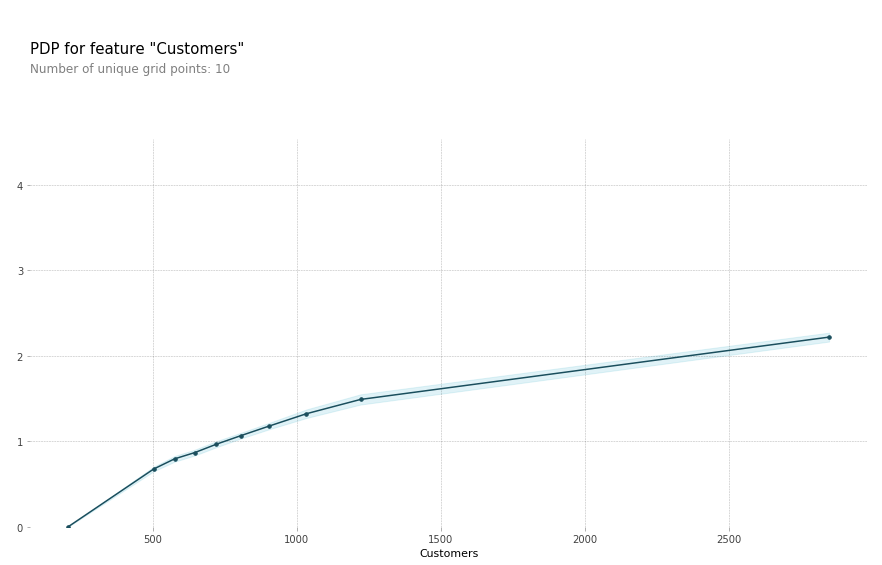

In [23]:
# Partial Dependency Plot 1, feature isolation

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Customers'

isolated = pdp_isolate(
    model=model, 
    dataset=X_train_encoded, 
    model_features=X_train_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

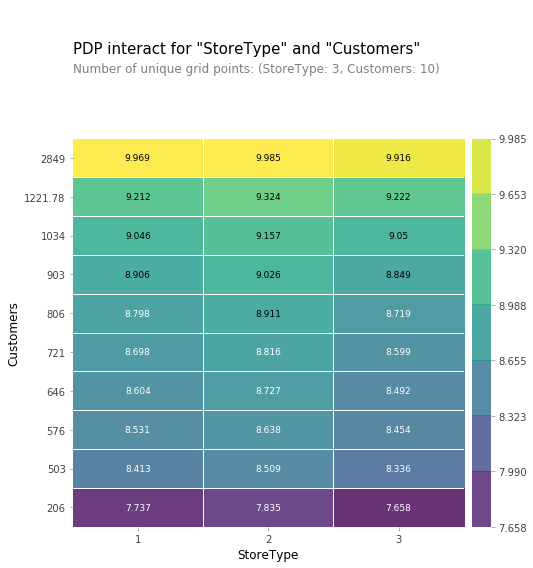

In [24]:
#Partial Dependency Plot 2, feature interaction

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['StoreType', 'Customers']

interaction = pdp_interact(
    model=model, 
    dataset=X_train_encoded, 
    model_features=X_train_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);